# Lab 0: Introduction to ADQL and Gaia Data
Jacqueline Telson

## Install & Import Necessary Packages

In [1]:
# Astroquery is needed to combine ADQL queries with Python code
#!pip install astroquery (uncomment this line if your computer does not already have astroquery installed)
from astroquery.utils.tap.core import TapPlus

# Matplotlib.pyplot is needed for the graphs that I will be making
import matplotlib.pyplot as plt

# Numpy is needed for mathematical functions such as log base 10.
import numpy as np

## Querey from Gaia Catalog

In [2]:
# load the gaiaedr3.gaia_source catalog
gaia = TapPlus(url="https://gea.esac.esa.int/tap-server/tap")

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


### Hyades

In [3]:
# querey from table, selecting for ra and dec in a range around the given values for Hyades (ra=68.5 & dec=15.6)
job_H1 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<71.5 AND ra>65.5 AND dec<18.6 AND dec>12.6")
querey_H1 = job_H1.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


### M67

In [4]:
# querey from table, selecting for ra and dec in a range around the given values for M67 (ra=215.7 & dec=31.9)
# to narrow down the results further, I selected only for parallax around 1.13, pmra around -10.9, and pmdec around -2.9
# (I found these values from this website: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=M67)
job_M1 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<218.7 AND ra>212.7 AND dec<34.9 AND dec>28.9 \
AND parallax<1.75 AND parallax>0.5 \
AND pmra<-7.9 AND pmra>-13.9 AND pmdec<1.9 AND pmdec>-5.9")
querey_M1 = job_M1.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


### NGC 6397

In [5]:
# querey from table, selecting for ra and dec in a range around the given values for NGC 6397 (ra=338.2 & dec=-12.0)
# to narrow down the results further, I selected only for parallax around 0.42, pmra around 3.3, and pmdec around -17.6
# (I found these values from this website: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+6397&submit=submit+id)
job_N1 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<340.2 AND ra>336.2 AND dec<-10.0 AND dec>-14.0 \
AND parallax<1 AND parallax>0 \
AND pmra<6.3 AND pmra>0.3 AND pmdec>-20.6 AND pmdec<-14.6")
querey_N1 = job_N1.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


## Explore Data

### Hyades

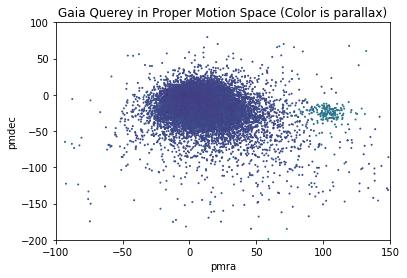

In [6]:
# Visualize stars in querey in proper motion space to eyeball where cluster members are
plt.scatter(querey_H1['pmra'], querey_H1['pmdec'], c=querey_H1['parallax'], s=1)
plt.xlim(-100,150)
plt.ylim(-200,100)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Gaia Querey in Proper Motion Space (Color is parallax)')
plt.show()

From this graph, we can see that there is a cluster centered around about pmra=100 and pmdec=-25. Also, we can see that this cluster has a different average parallax than the background stars which are centered around 0. Therefore, I will now narrow down to only include stars with 75<pmra<140 and -50<pmdec<0

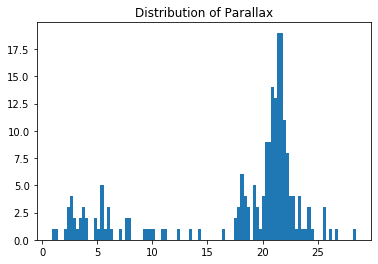

In [7]:
# I will transform the astropy table into a pandas data frame because I am more familiar working with pandas.
df_H1 = querey_H1.to_pandas()

# Make pmra and pmdec cuts that I mentioned above
df_H1 = df_H1[(df_H1['pmra']>75) & (df_H1['pmra']<140)]
df_H1 = df_H1[(df_H1['pmdec']>-50) & (df_H1['pmdec']<0)]

# Plot the distribution of parallax
plt.hist(df_H1['parallax'], bins=100)
plt.title('Distribution of Parallax')
plt.show()

There seems to be a spike around 21 so I will narrow down to 20 < parallax < 23

In [8]:
# New querey with cuts for pmra, pmdec, and parallax
job_H2 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<71.5 AND ra>65.5 AND dec<18.6 AND dec>12.6 \
AND parallax>20 AND parallax<23 \
AND pmra>75 AND pmra<140 AND pmdec>-50 AND pmdec<0")
querey_H2 = job_H2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


### M67

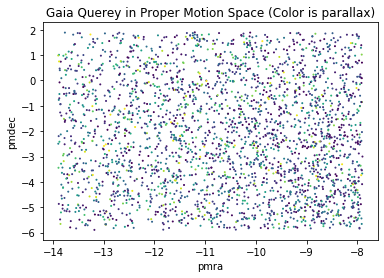

In [9]:
# Visualize stars in querey in proper motion space to eyeball where cluster members are
plt.scatter(querey_M1['pmra'], querey_M1['pmdec'], c=querey_M1['parallax'], s=1)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Gaia Querey in Proper Motion Space (Color is parallax)')
plt.show()

It is difficult to tell where the cluster is from this graph, so I will now investigate the parallax. 

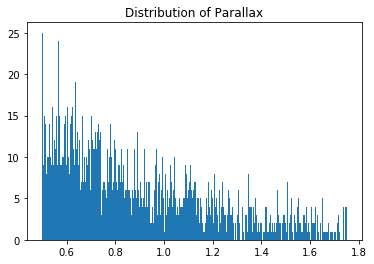

In [10]:
plt.hist(querey_M1['parallax'], bins=500)
plt.title('Distribution of Parallax')
plt.show()

It looks as if there is a cluster from 1.0 to 1.19, so I will cut down the parallax into that range

In [11]:
# New querey with cuts for pmra, pmdec, and parallax
job_M2 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<218.7 AND ra>212.7 AND dec<34.9 AND dec>28.9 \
AND parallax<1.19 AND parallax>1.0 \
AND pmra<-7.9 AND pmra>-13.9 AND pmdec<1.9 AND pmdec>-5.9")
querey_M2 = job_M2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


### NGC 6397

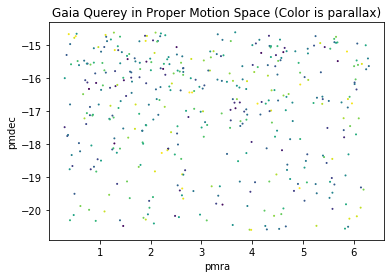

In [12]:
# Visualize stars in querey in proper motion space to eyeball where cluster members are
plt.scatter(querey_N1['pmra'], querey_N1['pmdec'], c=querey_N1['parallax'], s=1)
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.title('Gaia Querey in Proper Motion Space (Color is parallax)')
plt.show()

It is difficult to tell where the cluster is from this graph, so I will now investigate the parallax. 

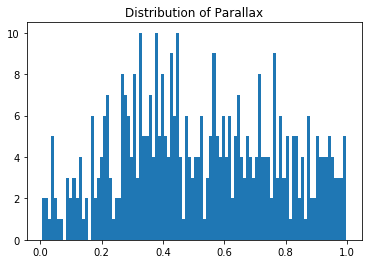

In [13]:
plt.hist(querey_N1['parallax'], bins=100)
plt.title('Distribution of Parallax')
plt.show()

## Plot Color - Absolute Magnitude Diagram

### Hyades

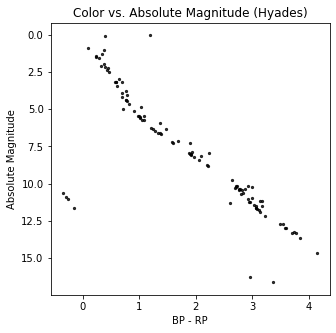

In [14]:
# create Absolute Magnitude and Color variables
absolute_mag_H2 = querey_H2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H2['parallax']/1000)
color_H2 = querey_H2['bp_rp']

# instantiate figure
fig, ax = plt.subplots(figsize=(5,5))

# scatter plot between color and absolute magnitude
ax.scatter(color_H2, absolute_mag_H2, alpha=0.8, s=5, c='k')

# larger magnitude means that the star is more faint
ax.invert_yaxis()

#labels
plt.title('Color vs. Absolute Magnitude (Hyades)')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

plt.show()

### M67

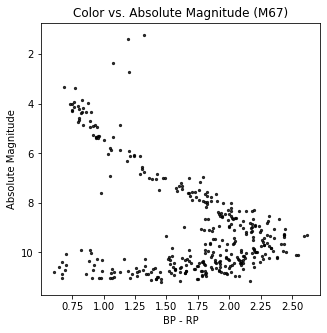

In [15]:
# create Absolute Magnitude and Color variables
absolute_mag_M2 = querey_M2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M2['parallax']/1000)
color_M2 = querey_M2['bp_rp']

# instantiate figure
fig, ax = plt.subplots(figsize=(5,5))

# scatter plot between color and absolute magnitude
ax.scatter(color_M2, absolute_mag_M2, alpha=0.8, s=5, c='k')

# larger magnitude means that the star is more faint
ax.invert_yaxis()

#labels
plt.title('Color vs. Absolute Magnitude (M67)')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

plt.show()

### NGC 6397

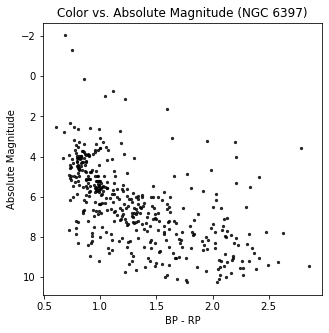

In [16]:
# create Absolute Magnitude and Color variables
absolute_mag_N1 = querey_N1['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N1['parallax']/1000)
color_N1 = querey_N1['bp_rp']

# instantiate figure
fig, ax = plt.subplots(figsize=(5,5))

# scatter plot between color and absolute magnitude
ax.scatter(color_N1, absolute_mag_N1, alpha=0.8, s=5, c='k')

# larger magnitude means that the star is more faint
ax.invert_yaxis()

#labels
plt.title('Color vs. Absolute Magnitude (NGC 6397)')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

plt.show()

## Plot Cluster Members in Proper Motion Space

### Hyades

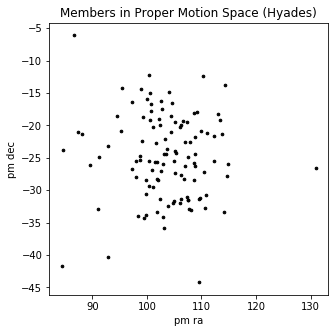

In [17]:
# instantiate figure
fig, ax = plt.subplots(figsize=(5,5))

# scatter plot between pmra and pmdec
ax.scatter(querey_H2['pmra'], querey_H2['pmdec'], s=7, c='k')

#labels
plt.title('Members in Proper Motion Space (Hyades)')
plt.ylabel('pm dec')
plt.xlabel('pm ra')

plt.show()

### M67

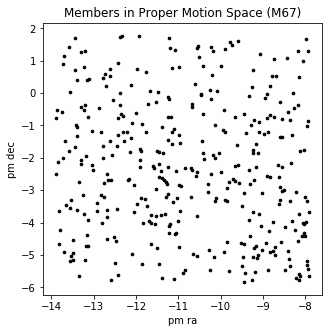

In [18]:
# instantiate figure
fig, ax = plt.subplots(figsize=(5,5))

# scatter plot between pmra and pmdec
ax.scatter(querey_M2['pmra'], querey_M2['pmdec'], s=7, c='k')

#labels
plt.title('Members in Proper Motion Space (M67)')
plt.ylabel('pm dec')
plt.xlabel('pm ra')

plt.show()

### NGC 6397

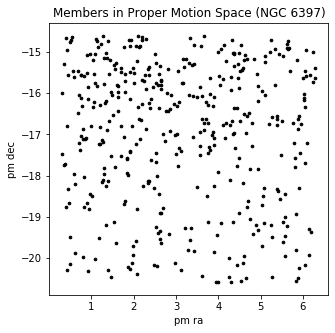

In [19]:
# instantiate figure
fig, ax = plt.subplots(figsize=(5,5))

# scatter plot between pmra and pmdec
ax.scatter(querey_N1['pmra'], querey_N1['pmdec'], s=7, c='k')

#labels
plt.title('Members in Proper Motion Space (NGC 6397)')
plt.ylabel('pm dec')
plt.xlabel('pm ra')

plt.show()

## Querey with Quality Cuts

I used the main quality cuts from Babusiaux et al. 2018

### Hyades

In [3]:
job_H3 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<71.5 AND ra>65.5 AND dec<18.6 AND dec>12.6 \
AND parallax>20 AND parallax<23 \
AND pmra>75 AND pmra<125 AND pmdec>-50 AND pmdec<0 \
AND parallax_over_error>10 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20")

querey_H3 = job_H3.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


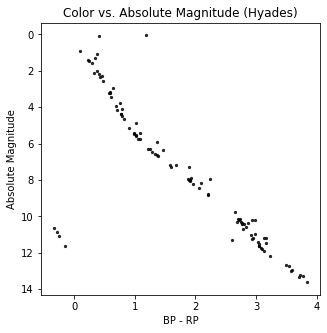

In [21]:
# plot again to see quality difference

# Color vs Absolute Mag Graph
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, s=5, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades)')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')
plt.show()

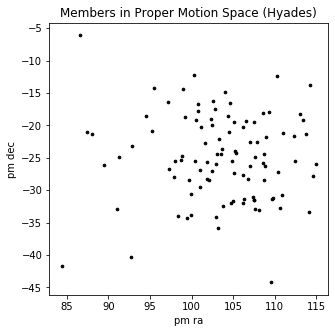

In [22]:
# Proper Motion Space Graph
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(querey_H3['pmra'], querey_H3['pmdec'], s=7, c='k')
plt.title('Members in Proper Motion Space (Hyades)')
plt.ylabel('pm dec')
plt.xlabel('pm ra')
plt.show()

In [23]:
len(querey_H2) - len(querey_H3)

11

The quality cuts eliminated 11 stars from the querey.

### M67

In [4]:
job_M3 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<218.7 AND ra>212.7 AND dec<34.9 AND dec>28.9 \
AND parallax<1.19 AND parallax>1.0 \
AND pmra<-7.9 AND pmra>-13.9 AND pmdec<1.9 AND pmdec>-5.9 \
AND parallax_over_error>5 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20")

querey_M3 = job_M3.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


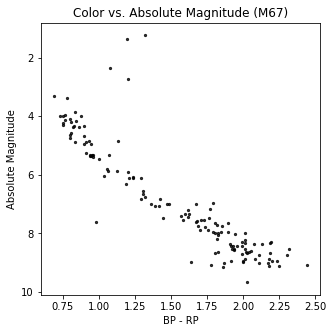

In [25]:
# plot again to see quality difference

# Color vs Absolute Mag Graph
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, s=5, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67)')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')
plt.show()

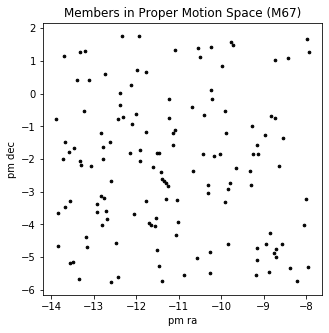

In [26]:
# Proper Motion Space Graph
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(querey_M3['pmra'], querey_M3['pmdec'], s=7, c='k')
plt.title('Members in Proper Motion Space (M67)')
plt.ylabel('pm dec')
plt.xlabel('pm ra')
plt.show()

In [27]:
len(querey_M2) - len(querey_M3)

231

The quality cuts eliminated 231 stars from the querey. The HR Diagram looks more defined after the quality cuts.

### NGC 6397

In [5]:
job_N2 = gaia.launch_job_async("SELECT bp_rp, phot_g_mean_mag, parallax, pm, pmra, pmdec \
FROM gaiaedr3.gaia_source \
WHERE ra<340.2 AND ra>336.2 AND dec<-10.0 AND dec>-14.0 \
AND parallax<1 AND parallax>0 \
AND pmra<6.3 AND pmra>0.3 AND pmdec>-20.6 AND pmdec<-14.6 \
AND parallax_over_error>5 \
AND phot_g_mean_flux_over_error>50 \
AND phot_rp_mean_flux_over_error>20 \
AND phot_bp_mean_flux_over_error>20")

querey_N2 = job_N2.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


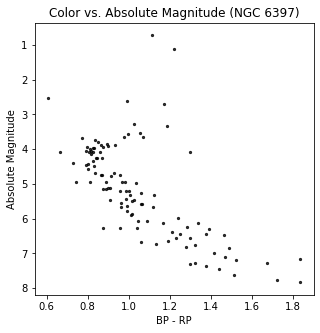

In [29]:
# plot again to see quality difference

# Color vs Absolute Mag Graph
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, s=5, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397)')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')
plt.show()

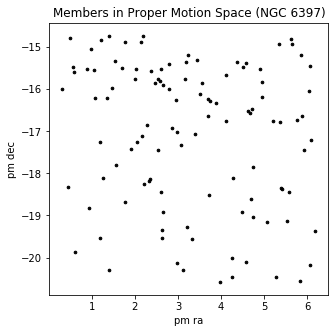

In [30]:
# Proper Motion Space Graph
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(querey_N2['pmra'], querey_N2['pmdec'], s=7, c='k')
plt.title('Members in Proper Motion Space (NGC 6397)')
plt.ylabel('pm dec')
plt.xlabel('pm ra')
plt.show()

In [31]:
len(querey_N1) - len(querey_N2)

310

The quality cuts eliminated 231 stars from the querey. The HR Diagram looks much more defined afte the quality cuts.

## Overplot Synthetic Photometry in Gaia Bands from Theoretical Isochrones

### Hyades

In [32]:
# use MIST models with metallicity of 0.14 (avg metallicity of Hyades cluster from google)

# read in CMD file
import read_mist_models
isocmd = read_mist_models.ISOCMD('MIST_iso_601834c7c55f4.iso.cmd')

Reading in: MIST_iso_601834c7c55f4.iso.cmd


In [33]:
# check the data in the file
print('available columns: ', isocmd.hdr_list)

available columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 'Gaia_RP_DR2Rev', 'Gaia_G_MAW', 'Gaia_BP_MAWb', 'Gaia_BP_MAWf', 'Gaia_RP_MAW', 'TESS', 'Gaia_G_EDR3', 'Gaia_BP_EDR3', 'Gaia_RP_EDR3', 'phase']


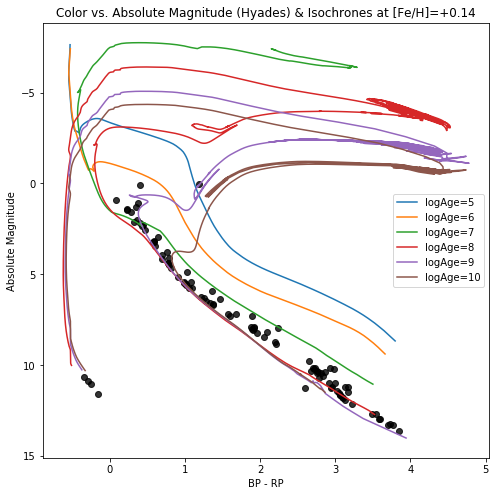

In [34]:
# Color vs Absolute Mag Graph
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades) & Isochrones at [Fe/H]=+0.14')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

When the metallicity is 0.14, it seems that the isochrone for a logAge between 8 and 9 seems to best fit the data. This corresponds to an age between 10^8 and 10^9 years (the red and purple lines). From google, the age of Hyades is 6.3*10^8

### M67

In [35]:
# use MIST models with metallicity of -0.04 (avg metallicity of M67 cluster from http://adsabs.harvard.edu/full/1991AJ....102.1070H)

# read in CMD file
isocmd = read_mist_models.ISOCMD('MIST_iso_601c98981a0f5.iso.cmd')

Reading in: MIST_iso_601c98981a0f5.iso.cmd


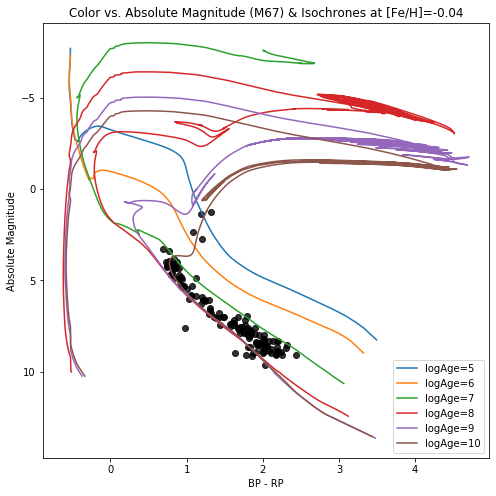

In [36]:
# Color vs Absolute Mag Graph
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67) & Isochrones at [Fe/H]=-0.04')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

When the metallicity is -0.04, it seems that the isochrone for a logAge of 10 seems to best fit the data. This corresponds to an age of about 10^10 years (the brown line). From google, the age of M67 is about 5*10^9 years.

### NGC 6397

In [37]:
# use MIST models with metallicity of -1.76 (avg metallicity of NGC 6397 cluster from https://en.wikipedia.org/wiki/NGC_6397)

# read in CMD file
isocmd = read_mist_models.ISOCMD('MIST_iso_601ce45788a28.iso.cmd')

Reading in: MIST_iso_601ce45788a28.iso.cmd


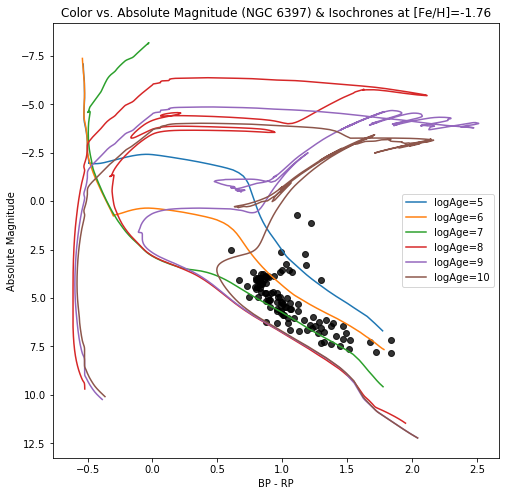

In [38]:
# Color vs Absolute Mag Graph
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397) & Isochrones at [Fe/H]=-1.76')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

When the metallicity is -0.04, it seems that the isochrone for a logAge of 10 seems to best fit the data. This corresponds to an age of about 10^10 years (the brown line). However, it is still not a great fit. The value that I have for metallicity could possibly be wrong, therefore it will be especially informative to graph for other metallicities. From google, the age of NGC 6397 is about 1.34*10^10 years.

## Repeat for various metallicities

### Hyades

Reading in: MIST_iso_6018540ede39b.iso.cmd


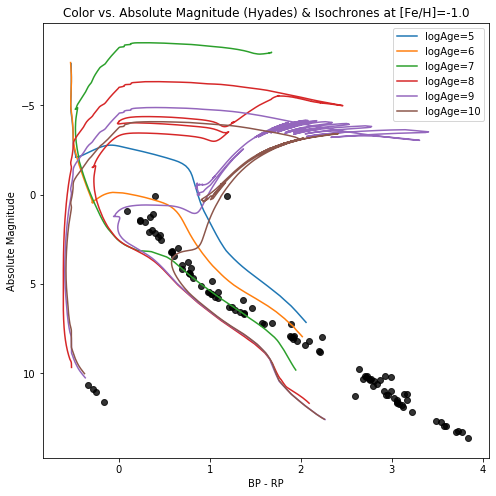

In [39]:
# [Fe/H] = -1.0
isocmd = read_mist_models.ISOCMD('MIST_iso_6018540ede39b.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades) & Isochrones at [Fe/H]=-1.0')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_6018550f10070.iso.cmd


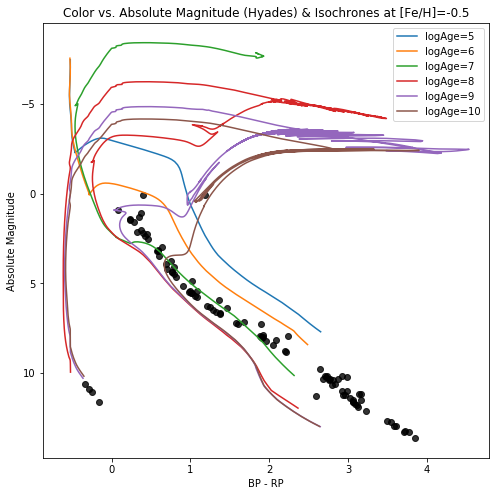

In [40]:
# [Fe/H] = -0.5
isocmd = read_mist_models.ISOCMD('MIST_iso_6018550f10070.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades) & Isochrones at [Fe/H]=-0.5')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601855a56659a.iso.cmd


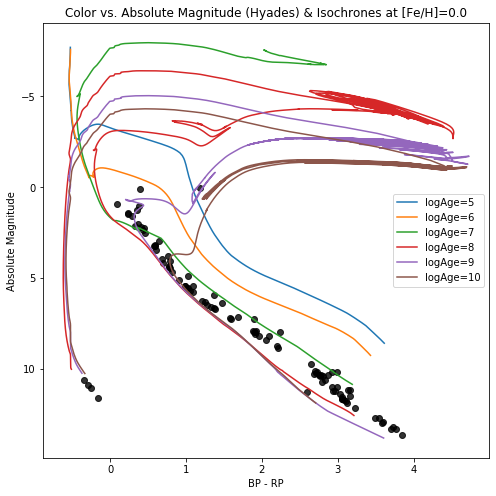

In [41]:
# [Fe/H] = 0
isocmd = read_mist_models.ISOCMD('MIST_iso_601855a56659a.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades) & Isochrones at [Fe/H]=0.0')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_60185649a28ca.iso.cmd


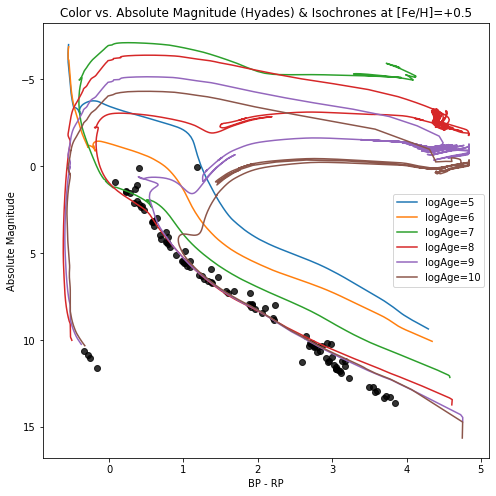

In [42]:
# [Fe/H] = +0.5
isocmd = read_mist_models.ISOCMD('MIST_iso_60185649a28ca.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades) & Isochrones at [Fe/H]=+0.5')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

The data seems to best fit with the isochrones between 0 metallicity and +0.5 metallicity at an age of 10^9. This lines up with the correct metallicity being +0.14

### M67

Reading in: MIST_iso_601cc77f4054a.iso.cmd


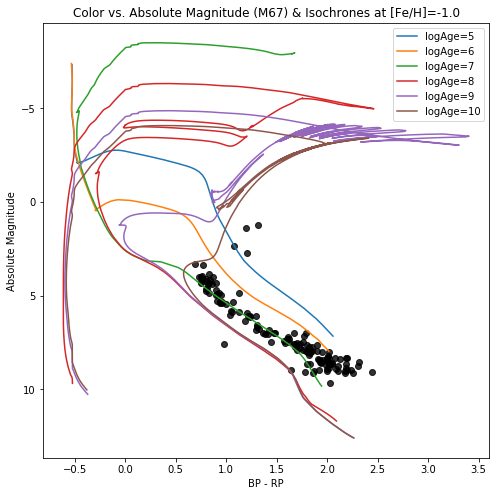

In [43]:
# [Fe/H] = -1.0
isocmd = read_mist_models.ISOCMD('MIST_iso_601cc77f4054a.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67) & Isochrones at [Fe/H]=-1.0')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601cca17063e8.iso.cmd


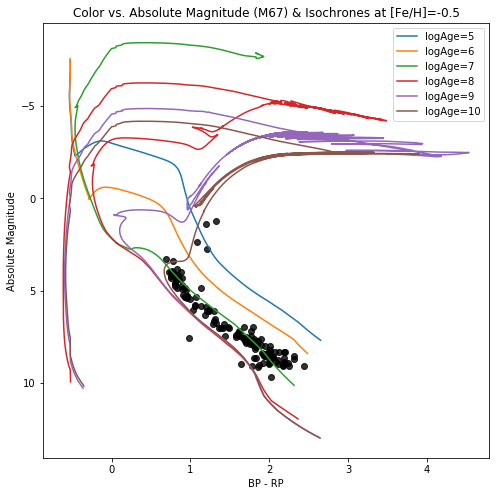

In [44]:
# [Fe/H] = -0.5
isocmd = read_mist_models.ISOCMD('MIST_iso_601cca17063e8.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67) & Isochrones at [Fe/H]=-0.5')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601cce98ed187.iso.cmd


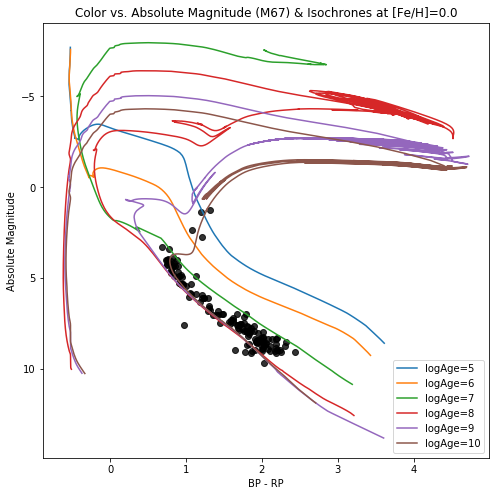

In [45]:
# [Fe/H] = 0.0
isocmd = read_mist_models.ISOCMD('MIST_iso_601cce98ed187.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67) & Isochrones at [Fe/H]=0.0')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601ccf48e6ead.iso.cmd


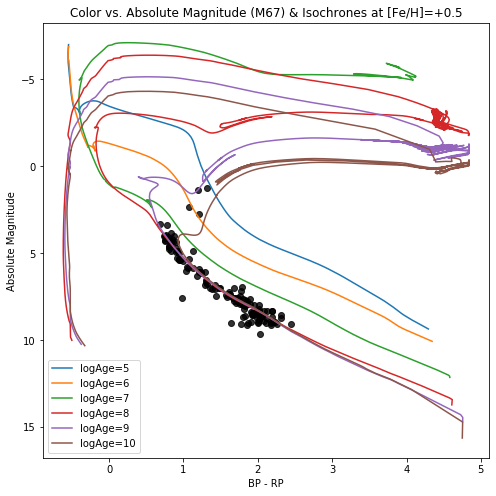

In [46]:
# [Fe/H] = +0.5
isocmd = read_mist_models.ISOCMD('MIST_iso_601ccf48e6ead.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67) & Isochrones at [Fe/H]=+0.5')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

The data seems to best fit with the 0.0 metallicity isochrone at an age of 10^10. This lines up with the correct metallicity being -0.04

### NGC 6397

Reading in: MIST_iso_6018540ede39b.iso.cmd


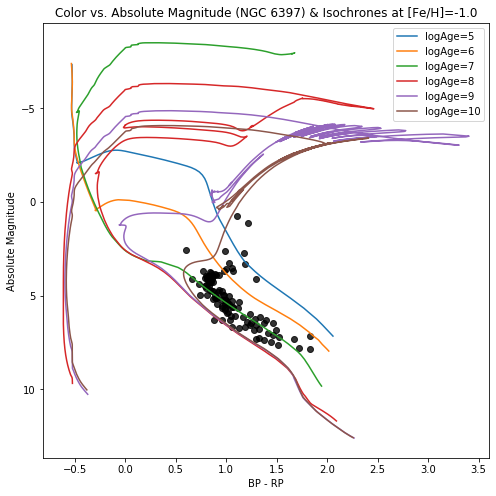

In [47]:
# [Fe/H] = -1.0
isocmd = read_mist_models.ISOCMD('MIST_iso_6018540ede39b.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397) & Isochrones at [Fe/H]=-1.0')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601cca17063e8.iso.cmd


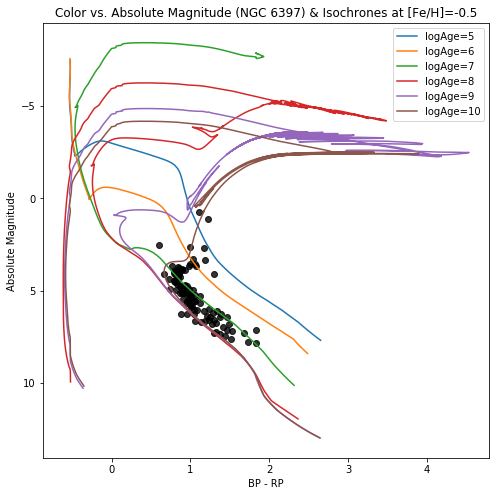

In [48]:
# [Fe/H] = -0.5
isocmd = read_mist_models.ISOCMD('MIST_iso_601cca17063e8.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397) & Isochrones at [Fe/H]=-0.5')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601cce98ed187.iso.cmd


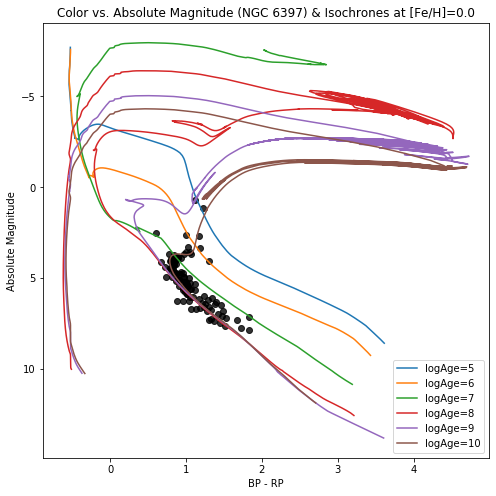

In [49]:
# [Fe/H] = 0.0
isocmd = read_mist_models.ISOCMD('MIST_iso_601cce98ed187.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397) & Isochrones at [Fe/H]=0.0')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

Reading in: MIST_iso_601ccf48e6ead.iso.cmd


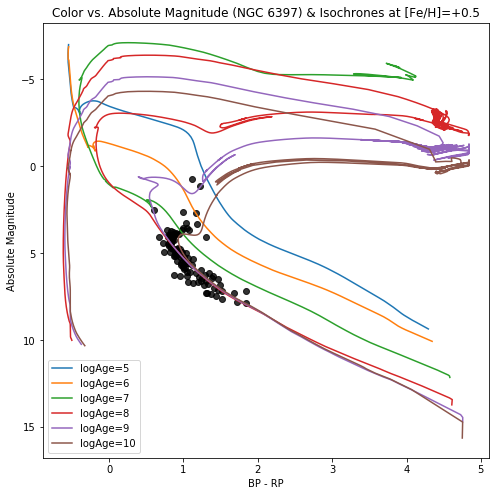

In [50]:
# [Fe/H] = +0.5
isocmd = read_mist_models.ISOCMD('MIST_iso_601ccf48e6ead.iso.cmd')

# Color vs Absolute Mag Graph
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397) & Isochrones at [Fe/H]=+0.5')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

# overplot some synthetic photometry in Gaia bands from theoretical isochrones for a range of ages
for age in np.arange(5,11):
    age_ind = isocmd.age_index(age) #returns the index for the desired age
    theoretical_color = isocmd.isocmds[age_ind]['Gaia_BP_EDR3']-isocmd.isocmds[age_ind]['Gaia_RP_EDR3']
    theoretical_abs_mag = isocmd.isocmds[age_ind]['Gaia_G_EDR3']
    ax.plot(theoretical_color, theoretical_abs_mag, label='logAge='+str(age))

plt.legend()
plt.show()

The data seems to best fit with the 0.0 metallicity isochrone with a logAge of 10 (10^10 yrs)

## Compare with PARSEC Models

### Hyades
In the following PARSEC model, I specified a log age range of 8 to 9 and a metallicity of +0.14

In [21]:
from astropy.table import Table

In [50]:
h_age800 = Table.read('output394642112384.dat',format='ascii')
h_age825 = Table.read('output376579866352.dat',format='ascii')
h_age850 = Table.read('output94013420938.dat',format='ascii')
h_age875 = Table.read('output680357492369.dat',format='ascii')
h_age900 = Table.read('output453115638651.dat',format='ascii')

In [30]:
Mg = 'col29'
bp = 'col30'
rp = 'col31'
logAge = 'col3'

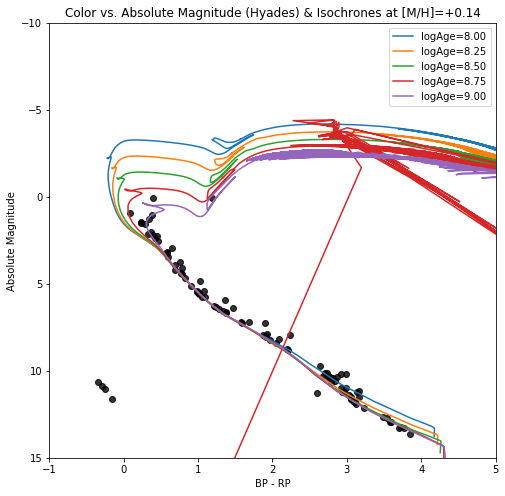

In [57]:
# Plot Isochrone
absolute_mag_H3 = querey_H3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_H3['parallax']/1000)
color_H3 = querey_H3['bp_rp']

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_H3, absolute_mag_H3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (Hyades) & Isochrones at [M/H]=+0.14')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

ax.plot(h_age800[bp]-h_age800[rp], h_age800[Mg], label='logAge=8.00')
ax.plot(h_age825[bp]-h_age825[rp], h_age825[Mg], label='logAge=8.25')
ax.plot(h_age850[bp]-h_age850[rp], h_age850[Mg], label='logAge=8.50')
ax.plot(h_age875[bp]-h_age875[rp], h_age875[Mg], label='logAge=8.75')
ax.plot(h_age900[bp]-h_age900[rp], h_age900[Mg], label='logAge=9.00')

plt.xlim(-1,5)
plt.ylim(15,-10)

plt.legend()
plt.show()

The above graph looks similar to the MIST isochrones, except for the offshoot on the red line. I am not sure what is causing that, so I will just focus on the area of the line that corresponds to where there are stars in the dataset.

With the PARSEC models at a metallicity of +0.14, the best age seems to be just above logAge=8.75. I will estimate as logAge=8.8. This corresponds to an age of 6.3*10^8, which perfectly matches the age that I found online.

### M67
In the following PARSEC model, I specified a log age range of 9 to 10 and a metallicity of -0.04

In [55]:
m_age900 = Table.read('output418601041733.dat',format='ascii')
m_age925 = Table.read('output442452127653.dat',format='ascii')
m_age950 = Table.read('output493745274449.dat',format='ascii')
m_age975 = Table.read('output492652264264.dat',format='ascii')
m_age1000 = Table.read('output57421037302.dat',format='ascii')

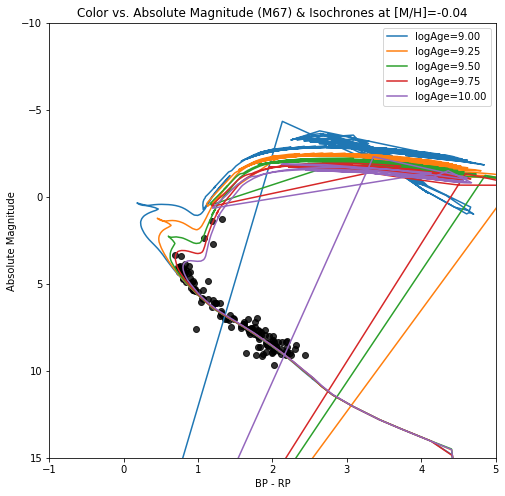

In [58]:
# Plot Isochrone
absolute_mag_M3 = querey_M3['phot_g_mean_mag'] + 5 + 5*np.log10(querey_M3['parallax']/1000)
color_M3 = querey_M3['bp_rp']

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_M3, absolute_mag_M3, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (M67) & Isochrones at [M/H]=-0.04')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

ax.plot(m_age900[bp]-m_age900[rp], m_age900[Mg], label='logAge=9.00')
ax.plot(m_age925[bp]-m_age925[rp], m_age925[Mg], label='logAge=9.25')
ax.plot(m_age950[bp]-m_age950[rp], m_age950[Mg], label='logAge=9.50')
ax.plot(m_age975[bp]-m_age975[rp], m_age975[Mg], label='logAge=9.75')
ax.plot(m_age1000[bp]-m_age1000[rp], m_age1000[Mg], label='logAge=10.00')

plt.xlim(-1,5)
plt.ylim(15,-10)

plt.legend()
plt.show()

With the PARSEC models at a metallicity of -0.04, the best age seems to be logAge=9.75. This corresponds to an age of 5.6*10^9, which on the same order of magnitude as the age that I found online (5*10^9).

### NGC 6397
In the following PARSEC model, I specified a log age range of 9.5 to 10.25 and a metallicity of -1.76

In [60]:
n_age950 = Table.read('output343865152754.dat',format='ascii')
n_age975 = Table.read('output858185622216.dat',format='ascii')
n_age1000 = Table.read('output428587477495.dat',format='ascii')
n_age1025 = Table.read('output363699249764.dat',format='ascii')

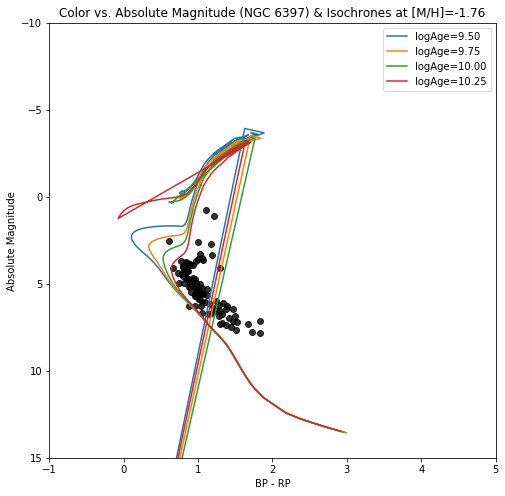

In [62]:
# Plot Isochrone
absolute_mag_N2 = querey_N2['phot_g_mean_mag'] + 5 + 5*np.log10(querey_N2['parallax']/1000)
color_N2 = querey_N2['bp_rp']

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(color_N2, absolute_mag_N2, alpha=0.8, c='k')
ax.invert_yaxis()
plt.title('Color vs. Absolute Magnitude (NGC 6397) & Isochrones at [M/H]=-1.76')
plt.ylabel('Absolute Magnitude')
plt.xlabel('BP - RP')

ax.plot(n_age950[bp]-n_age950[rp], n_age950[Mg], label='logAge=9.50')
ax.plot(n_age975[bp]-n_age975[rp], n_age975[Mg], label='logAge=9.75')
ax.plot(n_age1000[bp]-n_age1000[rp], n_age1000[Mg], label='logAge=10.00')
ax.plot(n_age1025[bp]-n_age1025[rp], n_age1025[Mg], label='logAge=10.25')

plt.xlim(-1,5)
plt.ylim(15,-10)

plt.legend()
plt.show()

With the PARSEC models at a metallicity of -1.76, the best age seems to be above logAge=10.25. I will estimate this as logAge=10.3. This corresponds to an age of 2*10^10, which on the same order of magnitude as the age that I found online (1.34*10^10).

The biggest significant differences between the PARSEC models and the MIST models is that the PARSEC models have linear offshoots coming from their super giant branch.